# Product Sales Analysis

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

#### Load Excel

In [18]:
df = pd.read_excel(r"C:\Users\SHAIK BASHEER\Downloads\sales_data_store1.xlsx")

In [19]:
df

,Date,Order ID,Product,Category,City,Quantity,Price,Channel,Total
0,2025-08-12,aeac293e-72c1-4e8e-ac7c-51e08ccd3ece,Eggs,Grocery,Chennai,4,8008.43,Online,32033.72
1,2025-08-13,33169884-0f5c-43dc-9cb7-cbdd9114c7ef,Jeans,Fashion,Hyderabad,2,48965.27,Retail Store,97930.54
2,2025-08-14,fba40c31-66b4-4bce-a648-1eac45a9f6d9,Sneakers,Fashion,Bangalore,3,4777.24,Retail Store,14331.72
3,2025-08-15,110cb06c-5dff-4c12-9d11-63d6e7849aa2,Jeans,Fashion,Bangalore,3,18605.08,Retail Store,55815.24
4,2025-08-16,40d4584b-4870-4c47-af66-bb765615fe12,T-Shirt,Fashion,Mumbai,2,38452.12,Online,76904.24
...,...,...,...,...,...,...,...,...,...
995,2028-05-03,afee7982-4e21-496b-8129-52aa9c397a56,Sofa,Home & Kitchen,Mumbai,3,13331.26,Retail Store,39993.78
996,2028-05-04,fa79a4b6-4889-4f4f-a4d4-e1aa20ea8a16,Milk,Grocery,Hyderabad,1,22837.65,Online,22837.65
997,2028-05-05,eaac064f-7a1a-4fbe-be47-3b2ee299d5c7,Smartphone,Electronics,Mumbai,2,34711.48,Online,69422.96
998,2028-05-06,615869f8-91cd-42b7-9498-4ecca26c084c,Headphones,Electronics,Hyderabad,4,14053.84,Retail Store,56215.36


In [20]:
df.head()

,Date,Order ID,Product,Category,City,Quantity,Price,Channel,Total
0,2025-08-12,aeac293e-72c1-4e8e-ac7c-51e08ccd3ece,Eggs,Grocery,Chennai,4,8008.43,Online,32033.72
1,2025-08-13,33169884-0f5c-43dc-9cb7-cbdd9114c7ef,Jeans,Fashion,Hyderabad,2,48965.27,Retail Store,97930.54
2,2025-08-14,fba40c31-66b4-4bce-a648-1eac45a9f6d9,Sneakers,Fashion,Bangalore,3,4777.24,Retail Store,14331.72
3,2025-08-15,110cb06c-5dff-4c12-9d11-63d6e7849aa2,Jeans,Fashion,Bangalore,3,18605.08,Retail Store,55815.24
4,2025-08-16,40d4584b-4870-4c47-af66-bb765615fe12,T-Shirt,Fashion,Mumbai,2,38452.12,Online,76904.24


In [21]:
df.tail()

,Date,Order ID,Product,Category,City,Quantity,Price,Channel,Total
995,2028-05-03,afee7982-4e21-496b-8129-52aa9c397a56,Sofa,Home & Kitchen,Mumbai,3,13331.26,Retail Store,39993.78
996,2028-05-04,fa79a4b6-4889-4f4f-a4d4-e1aa20ea8a16,Milk,Grocery,Hyderabad,1,22837.65,Online,22837.65
997,2028-05-05,eaac064f-7a1a-4fbe-be47-3b2ee299d5c7,Smartphone,Electronics,Mumbai,2,34711.48,Online,69422.96
998,2028-05-06,615869f8-91cd-42b7-9498-4ecca26c084c,Headphones,Electronics,Hyderabad,4,14053.84,Retail Store,56215.36
999,2028-05-07,9f10f7da-444d-4de5-9603-47a2827add18,Curtains,Home & Kitchen,Chennai,5,9428.92,Retail Store,47144.60


#### Data Cleaning

In [22]:
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
df['Total'] = pd.to_numeric(df['Total'], errors='coerce')
df['Price'] = pd.to_numeric(df['Price'], errors='coerce')
df['Quantity'] = pd.to_numeric(df['Quantity'], errors='coerce')

In [23]:
#Create 'Month' column as string for plotting
df['Month'] = df['Date'].dt.to_period('M').astype(str)

In [24]:
# Create output folder for charts
output_dir = "sales_charts"
os.makedirs(output_dir, exist_ok=True)

In [25]:
sns.set_theme(style="whitegrid")

### Monthly Sales Trend

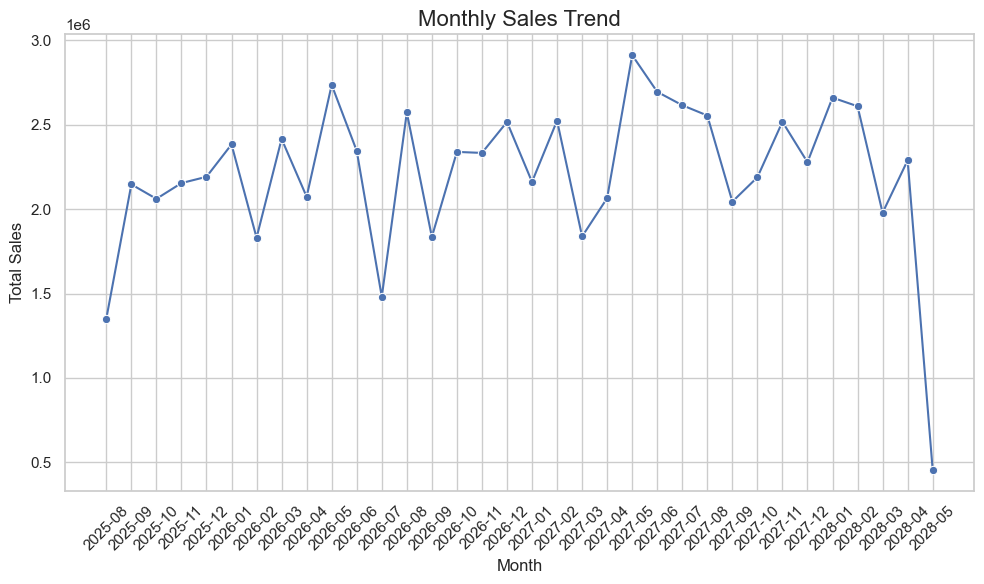

In [29]:
monthly_sales = df.groupby('Month')['Total'].sum().reset_index()

plt.figure(figsize=(10, 6))
sns.lineplot(x='Month', y='Total', data=monthly_sales, marker='o')
plt.title("Monthly Sales Trend", fontsize=16)
plt.xticks(rotation=45)
plt.ylabel("Total Sales")
plt.grid(True)
plt.tight_layout()

# Show in notebook
plt.show()


### Top 10 Product Sales

C:\Users\SHAIK BASHEER\AppData\Local\Temp\ipykernel_130844\1018690811.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Total', y='Product', data=top_products, palette='viridis')


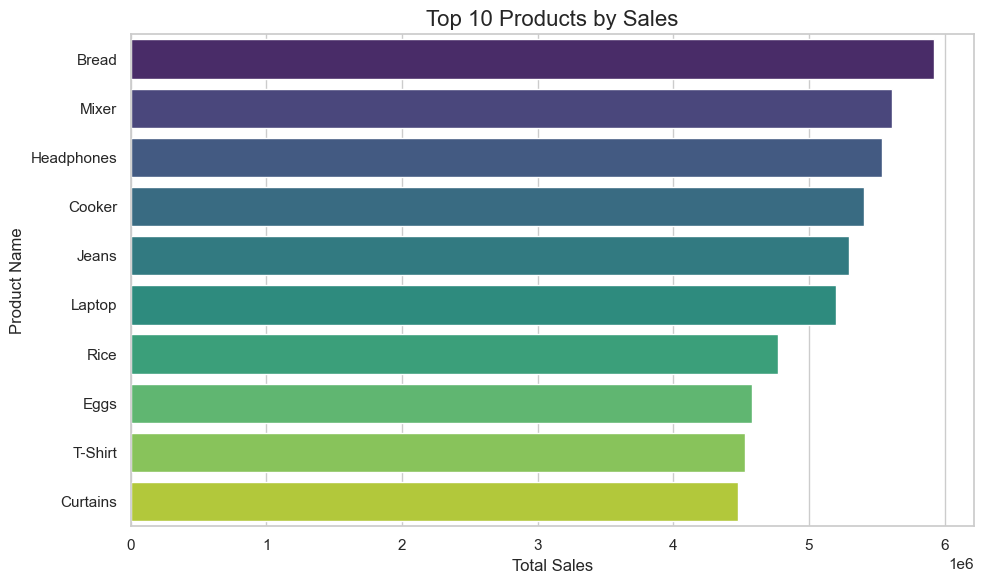

In [30]:
top_products = df.groupby('Product')['Total'].sum().nlargest(10).reset_index()
plt.figure(figsize=(10, 6))
sns.barplot(x='Total', y='Product', data=top_products, palette='viridis')
plt.title("Top 10 Products by Sales", fontsize=16)
plt.xlabel("Total Sales")
plt.ylabel("Product Name")
plt.tight_layout()

### Top 10 Products by Price (Cost per unit)

C:\Users\SHAIK BASHEER\AppData\Local\Temp\ipykernel_130844\446460821.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Price', y='Product', data=top_products_cost, palette='magma')


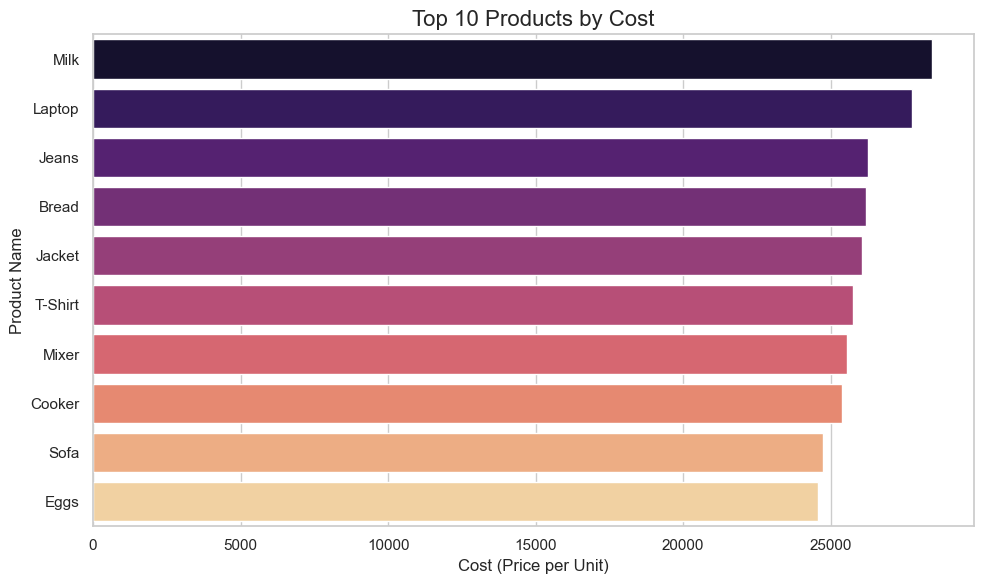

In [ ]:

top_products_cost = df.groupby('Product')['Price'].mean().nlargest(10).reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(x='Price', y='Product', data=top_products_cost, palette='magma')
plt.title("Top 10 Products by Cost", fontsize=16)
plt.xlabel("Cost (Price per Unit)")
plt.ylabel("Product Name")
plt.tight_layout()
plt.show()


C:\Users\SHAIK BASHEER\AppData\Local\Temp\ipykernel_130844\591117129.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(ax=axes[0], x='Total', y='Product', data=top_by_sales, palette='viridis')
C:\Users\SHAIK BASHEER\AppData\Local\Temp\ipykernel_130844\591117129.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(ax=axes[1], x='Price', y='Product', data=top_by_price, palette='magma')


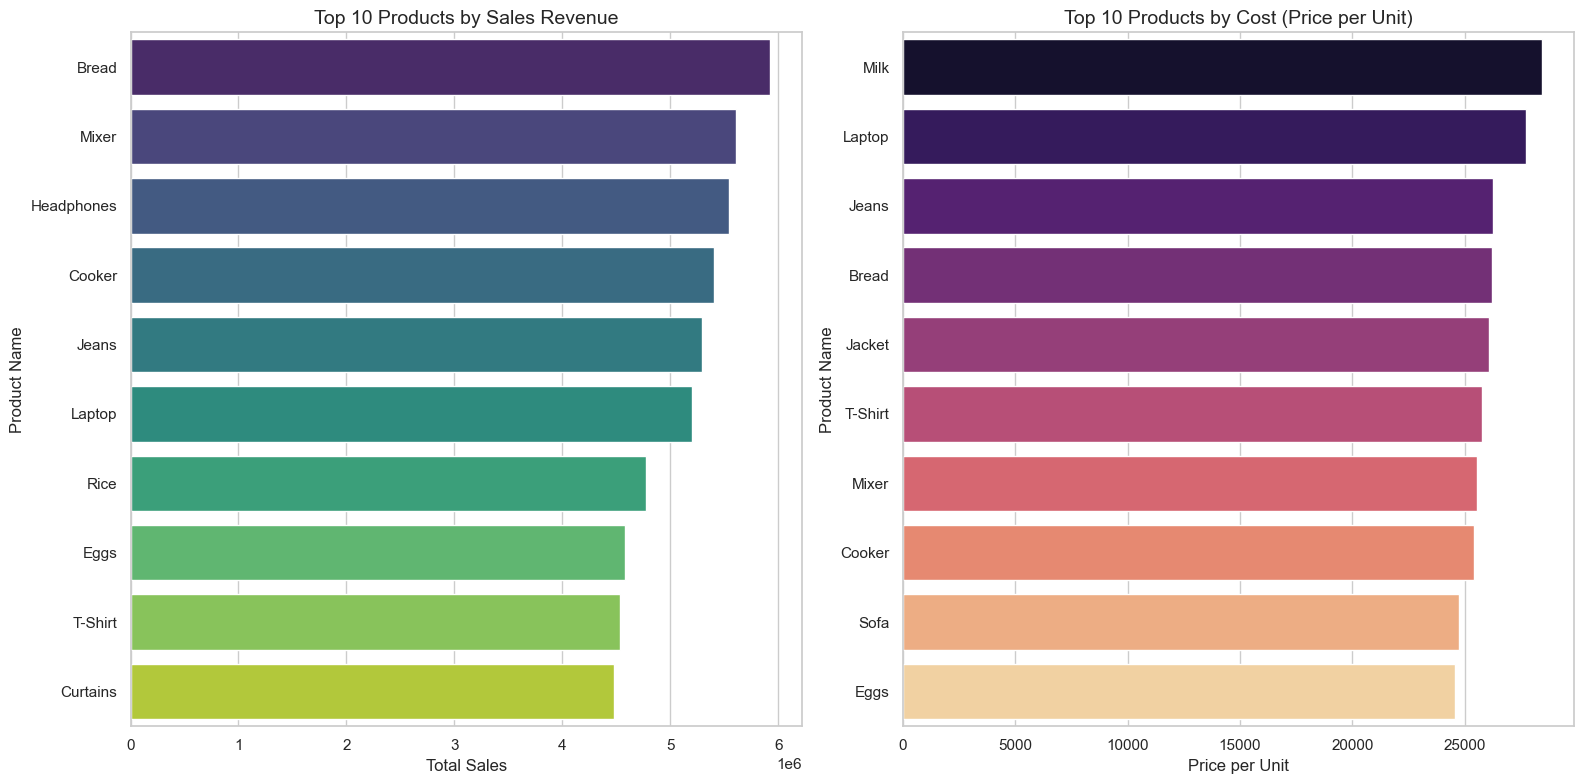

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns

# Top 10 Products by Total Sales
top_by_sales = df.groupby('Product')['Total'].sum().nlargest(10).reset_index()

# Top 10 Products by Price (Cost per unit)
top_by_price = df.groupby('Product')['Price'].mean().nlargest(10).reset_index()

# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(16, 8))

# Plot Top by Sales
sns.barplot(ax=axes[0], x='Total', y='Product', data=top_by_sales, palette='viridis')
axes[0].set_title("Top 10 Products by Sales Revenue", fontsize=14)
axes[0].set_xlabel("Total Sales")
axes[0].set_ylabel("Product Name")

# Plot Top by Price
sns.barplot(ax=axes[1], x='Price', y='Product', data=top_by_price, palette='magma')
axes[1].set_title("Top 10 Products by Cost (Price per Unit)", fontsize=14)
axes[1].set_xlabel("Price per Unit")
axes[1].set_ylabel("Product Name")

plt.tight_layout()
plt.show()


### Sales by Category

C:\Users\SHAIK BASHEER\AppData\Local\Temp\ipykernel_130844\3947082375.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Category', y='Total', data=category_sales, palette='Set2')


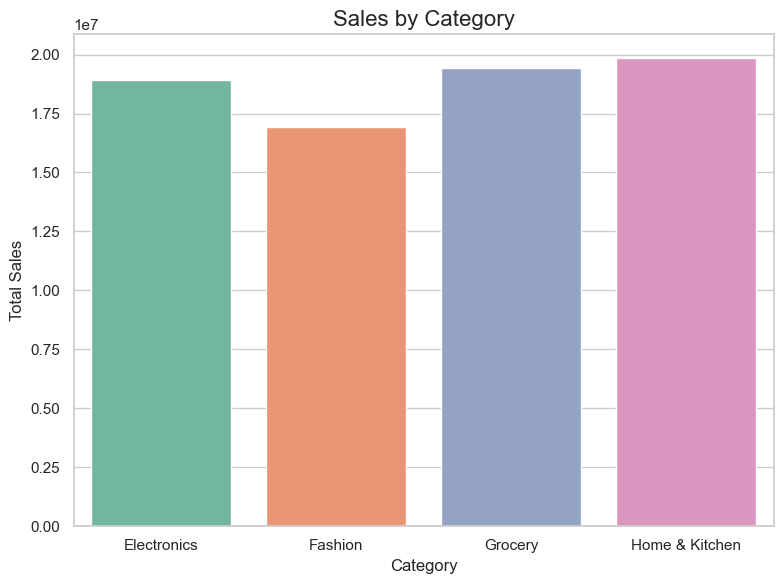

In [33]:
category_sales = df.groupby('Category')['Total'].sum().reset_index()
plt.figure(figsize=(8, 6))
sns.barplot(x='Category', y='Total', data=category_sales, palette='Set2')
plt.title("Sales by Category", fontsize=16)
plt.ylabel("Total Sales")
plt.tight_layout()

### Sales by City

C:\Users\SHAIK BASHEER\AppData\Local\Temp\ipykernel_130844\3446933513.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Total', y='City',


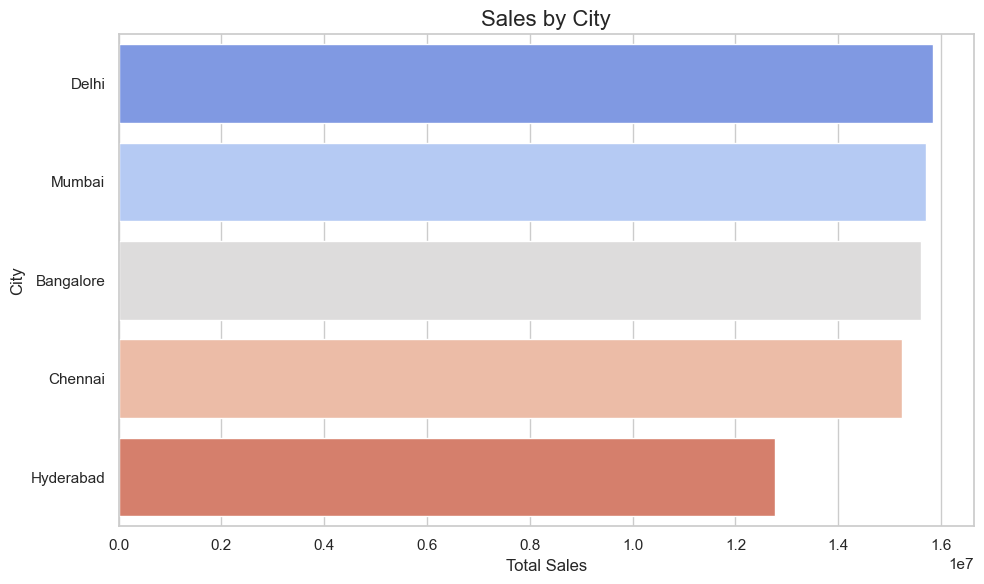

In [34]:
city_sales = df.groupby('City')['Total'].sum().reset_index()
plt.figure(figsize=(10, 6))
sns.barplot(x='Total', y='City',
            data=city_sales.sort_values(by='Total', ascending=False),
            palette='coolwarm')
plt.title("Sales by City", fontsize=16)
plt.xlabel("Total Sales")
plt.ylabel("City")
plt.tight_layout()

### Sales by Channel

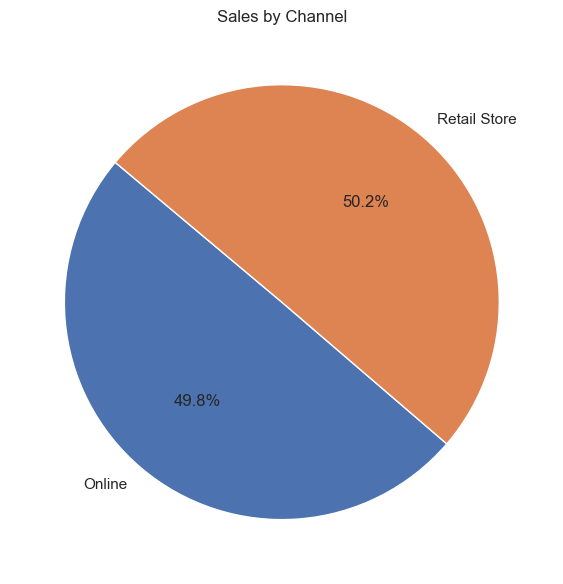

In [35]:
channel_sales = df.groupby('Channel')['Total'].sum().reset_index()
plt.figure(figsize=(6, 6))
plt.pie(channel_sales['Total'],
        labels=channel_sales['Channel'],
        autopct='%1.1f%%',
        startangle=140)
plt.title("Sales by Channel")
plt.tight_layout()

### Quantity Distribution

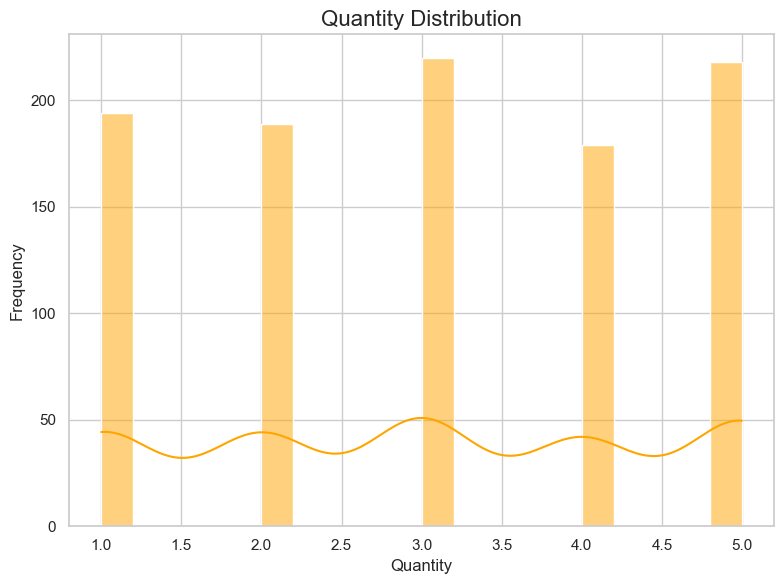

In [36]:
plt.figure(figsize=(8, 6))
sns.histplot(df['Quantity'], bins=20, kde=True, color='orange')
plt.title("Quantity Distribution", fontsize=16)
plt.xlabel("Quantity")
plt.ylabel("Frequency")
plt.tight_layout()

### overall sales distribution

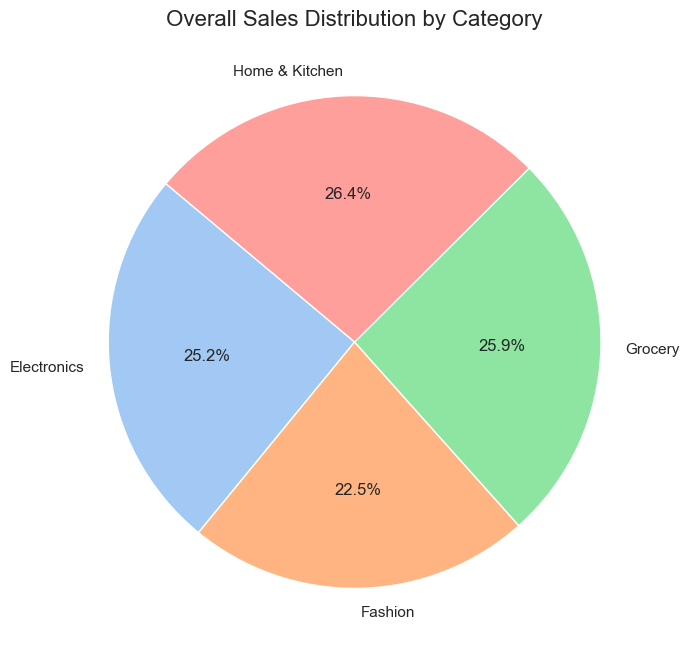

In [38]:
# Overall Sales Distribution by Category
category_sales = df.groupby('Category')['Total'].sum().reset_index()

plt.figure(figsize=(8, 8))
plt.pie(
    category_sales['Total'],
    labels=category_sales['Category'],
    autopct='%1.1f%%',
    startangle=140,
    colors=sns.color_palette('pastel')[0:len(category_sales)]
)
plt.title("Overall Sales Distribution by Category", fontsize=16)
plt.show()


### Interactive Sales Dashboard

In [40]:


# Dropdown filters
city_list = df['City'].unique()
category_list = df['Category'].unique()

# Interactive Sales Trend
fig = px.scatter(
    df,
    x="Date",
    y="Total",
    color="Category",
    size="Quantity",
    hover_data=["Product", "City", "Channel"],
    title="Interactive Sales Dashboard"
)
fig.show()


In [41]:
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
df['Month'] = df['Date'].dt.to_period('M').astype(str)

# Aggregate by month and product
monthly_top = df.groupby(['Month', 'Product'])['Total'].sum().reset_index()

# Sort for animation
fig = px.bar(
    monthly_top,
    x='Total',
    y='Product',
    color='Product',
    animation_frame='Month',
    range_x=[0, monthly_top['Total'].max()*1.2],
    title="Animated Top Products by Monthly Sales"
)
fig.update_layout(yaxis={'categoryorder':'total ascending'})
fig.show()


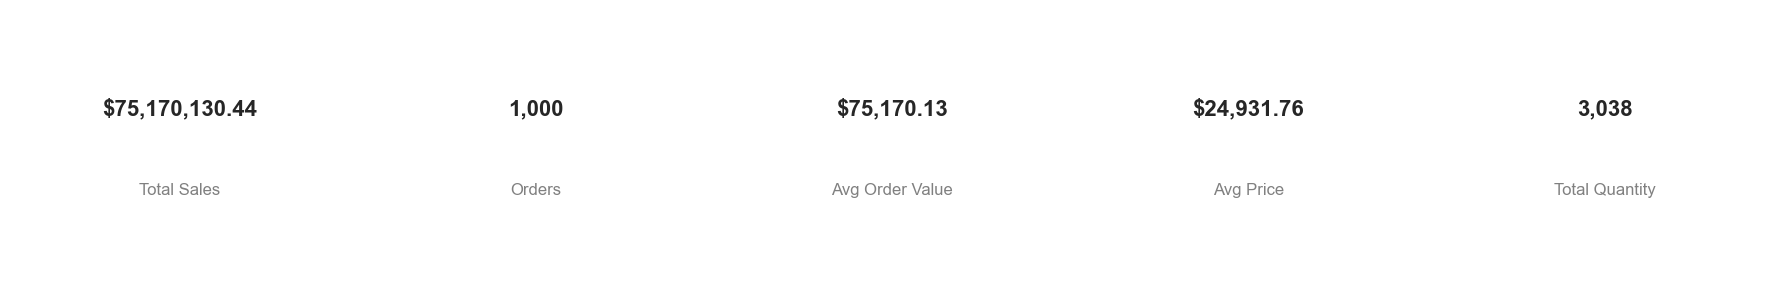

In [43]:

# Ensure numeric columns
for col in ['Total', 'Price', 'Quantity']:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# Add helper column for counting orders (1 per row)
df['OrderCount'] = 1  

# Calculate KPIs
total_sales = df['Total'].sum()
total_orders = df['OrderCount'].sum()
avg_order_value = total_sales / total_orders if total_orders > 0 else 0
avg_price = df['Price'].mean()
total_qty = df['Quantity'].sum()

# KPI dictionary
kpi_data = {
    "Total Sales": f"${total_sales:,.2f}",
    "Orders": f"{total_orders:,}",
    "Avg Order Value": f"${avg_order_value:,.2f}",
    "Avg Price": f"${avg_price:,.2f}",
    "Total Quantity": f"{total_qty:,}"
}

# Plot KPI cards
fig, axes = plt.subplots(1, len(kpi_data), figsize=(18, 3))
fig.patch.set_facecolor('white')

for ax, (title, value) in zip(axes, kpi_data.items()):
    ax.set_facecolor('#f5f5f5')
    ax.text(0.5, 0.6, value, fontsize=16, fontweight='bold', ha='center')
    ax.text(0.5, 0.3, title, fontsize=12, ha='center', color='gray')
    ax.axis('off')

plt.tight_layout()
plt.show()


In [47]:
import ipywidgets as widgets
from IPython.display import display
# City filter
city_filter = widgets.Dropdown(
    options=["All"] + sorted(df['City'].dropna().unique().tolist()),
    value="All",
    description='City:'
)

# Category filter
category_filter = widgets.Dropdown(
    options=["All"] + sorted(df['Category'].dropna().unique().tolist()),
    value="All",
    description='Category:'
)

# Date range filter
date_filter = widgets.SelectionRangeSlider(
    options=pd.date_range(df['Date'].min(), df['Date'].max(), freq='D'),
    index=(0, len(pd.date_range(df['Date'].min(), df['Date'].max(), freq='D')) - 1),
    description='Date Range',
    layout={'width': '800px'}
)

# Function to filter data
def filter_data(city, category, date_range):
    filtered_df = df.copy()
    if city != "All":
        filtered_df = filtered_df[filtered_df['City'] == city]
    if category != "All":
        filtered_df = filtered_df[filtered_df['Category'] == category]
    start_date, end_date = date_range
    filtered_df = filtered_df[
        (filtered_df['Date'] >= pd.to_datetime(start_date)) &
        (filtered_df['Date'] <= pd.to_datetime(end_date))
    ]
    display(filtered_df)

# Display filters and output
ui = widgets.VBox([city_filter, category_filter, date_filter])
out = widgets.interactive_output(
    filter_data,
    {'city': city_filter, 'category': category_filter, 'date_range': date_filter}
)

display(ui, out)

,Date,Order ID,Product,Category,City,Quantity,Price,Channel,Total,Month,OrderCount
0,2025-08-12,aeac293e-72c1-4e8e-ac7c-51e08ccd3ece,Eggs,Grocery,Chennai,4,8008.43,Online,32033.72,2025-08,1
1,2025-08-13,33169884-0f5c-43dc-9cb7-cbdd9114c7ef,Jeans,Fashion,Hyderabad,2,48965.27,Retail Store,97930.54,2025-08,1
2,2025-08-14,fba40c31-66b4-4bce-a648-1eac45a9f6d9,Sneakers,Fashion,Bangalore,3,4777.24,Retail Store,14331.72,2025-08,1
3,2025-08-15,110cb06c-5dff-4c12-9d11-63d6e7849aa2,Jeans,Fashion,Bangalore,3,18605.08,Retail Store,55815.24,2025-08,1
4,2025-08-16,40d4584b-4870-4c47-af66-bb765615fe12,T-Shirt,Fashion,Mumbai,2,38452.12,Online,76904.24,2025-08,1
...,...,...,...,...,...,...,...,...,...,...,...
995,2028-05-03,afee7982-4e21-496b-8129-52aa9c397a56,Sofa,Home & Kitchen,Mumbai,3,13331.26,Retail Store,39993.78,2028-05,1
996,2028-05-04,fa79a4b6-4889-4f4f-a4d4-e1aa20ea8a16,Milk,Grocery,Hyderabad,1,22837.65,Online,22837.65,2028-05,1
997,2028-05-05,eaac064f-7a1a-4fbe-be47-3b2ee299d5c7,Smartphone,Electronics,Mumbai,2,34711.48,Online,69422.96,2028-05,1
998,2028-05-06,615869f8-91cd-42b7-9498-4ecca26c084c,Headphones,Electronics,Hyderabad,4,14053.84,Retail Store,56215.36,2028-05,1


Output()

,Date,Order ID,Product,Category,City,Quantity,Price,Channel,Total,Month,OrderCount
0,2025-08-12,aeac293e-72c1-4e8e-ac7c-51e08ccd3ece,Eggs,Grocery,Chennai,4,8008.43,Online,32033.72,2025-08,1
1,2025-08-13,33169884-0f5c-43dc-9cb7-cbdd9114c7ef,Jeans,Fashion,Hyderabad,2,48965.27,Retail Store,97930.54,2025-08,1
2,2025-08-14,fba40c31-66b4-4bce-a648-1eac45a9f6d9,Sneakers,Fashion,Bangalore,3,4777.24,Retail Store,14331.72,2025-08,1
3,2025-08-15,110cb06c-5dff-4c12-9d11-63d6e7849aa2,Jeans,Fashion,Bangalore,3,18605.08,Retail Store,55815.24,2025-08,1
4,2025-08-16,40d4584b-4870-4c47-af66-bb765615fe12,T-Shirt,Fashion,Mumbai,2,38452.12,Online,76904.24,2025-08,1
...,...,...,...,...,...,...,...,...,...,...,...
993,2028-05-01,be532933-34d0-4011-a201-626e583091bc,Sofa,Home & Kitchen,Hyderabad,5,38545.24,Online,192726.20,2028-05,1
994,2028-05-02,7a379fef-2110-4b05-84d8-c3cc0bcc8ab1,T-Shirt,Fashion,Hyderabad,1,26634.97,Retail Store,26634.97,2028-05,1
995,2028-05-03,afee7982-4e21-496b-8129-52aa9c397a56,Sofa,Home & Kitchen,Mumbai,3,13331.26,Retail Store,39993.78,2028-05,1
996,2028-05-04,fa79a4b6-4889-4f4f-a4d4-e1aa20ea8a16,Milk,Grocery,Hyderabad,1,22837.65,Online,22837.65,2028-05,1


,Date,Order ID,Product,Category,City,Quantity,Price,Channel,Total,Month,OrderCount
0,2025-08-12,aeac293e-72c1-4e8e-ac7c-51e08ccd3ece,Eggs,Grocery,Chennai,4,8008.43,Online,32033.72,2025-08,1
1,2025-08-13,33169884-0f5c-43dc-9cb7-cbdd9114c7ef,Jeans,Fashion,Hyderabad,2,48965.27,Retail Store,97930.54,2025-08,1
2,2025-08-14,fba40c31-66b4-4bce-a648-1eac45a9f6d9,Sneakers,Fashion,Bangalore,3,4777.24,Retail Store,14331.72,2025-08,1
3,2025-08-15,110cb06c-5dff-4c12-9d11-63d6e7849aa2,Jeans,Fashion,Bangalore,3,18605.08,Retail Store,55815.24,2025-08,1
4,2025-08-16,40d4584b-4870-4c47-af66-bb765615fe12,T-Shirt,Fashion,Mumbai,2,38452.12,Online,76904.24,2025-08,1
...,...,...,...,...,...,...,...,...,...,...,...
944,2028-03-13,07fdf373-1b90-4964-bd77-cde28af357f2,Curtains,Home & Kitchen,Hyderabad,3,3734.41,Online,11203.23,2028-03,1
945,2028-03-14,0e566a88-9c5f-447a-bc1c-12a13e3f7628,Headphones,Electronics,Delhi,3,40318.72,Online,120956.16,2028-03,1
946,2028-03-15,026d0d4e-34c5-442f-b6b6-2e9f6cc79b3d,Rice,Grocery,Hyderabad,1,13642.85,Retail Store,13642.85,2028-03,1
947,2028-03-16,fe345805-a480-4228-86ac-d2ab18f4a15b,Mixer,Home & Kitchen,Chennai,5,29246.88,Retail Store,146234.40,2028-03,1


,Date,Order ID,Product,Category,City,Quantity,Price,Channel,Total,Month,OrderCount
0,2025-08-12,aeac293e-72c1-4e8e-ac7c-51e08ccd3ece,Eggs,Grocery,Chennai,4,8008.43,Online,32033.72,2025-08,1
1,2025-08-13,33169884-0f5c-43dc-9cb7-cbdd9114c7ef,Jeans,Fashion,Hyderabad,2,48965.27,Retail Store,97930.54,2025-08,1
2,2025-08-14,fba40c31-66b4-4bce-a648-1eac45a9f6d9,Sneakers,Fashion,Bangalore,3,4777.24,Retail Store,14331.72,2025-08,1
3,2025-08-15,110cb06c-5dff-4c12-9d11-63d6e7849aa2,Jeans,Fashion,Bangalore,3,18605.08,Retail Store,55815.24,2025-08,1
4,2025-08-16,40d4584b-4870-4c47-af66-bb765615fe12,T-Shirt,Fashion,Mumbai,2,38452.12,Online,76904.24,2025-08,1
...,...,...,...,...,...,...,...,...,...,...,...
929,2028-02-27,07b939f3-fe0a-47a1-9083-a307bc0d504a,Smartphone,Electronics,Bangalore,5,41433.84,Retail Store,207169.20,2028-02,1
930,2028-02-28,abd91f9a-de1a-4727-b0bf-a1ddf2d87d07,Curtains,Home & Kitchen,Mumbai,1,4850.48,Online,4850.48,2028-02,1
931,2028-02-29,ab7b9f4f-18d7-45ba-acdc-3c4d6231cf03,Eggs,Grocery,Bangalore,5,34418.37,Retail Store,172091.85,2028-02,1
932,2028-03-01,b9902d16-c174-4253-a994-0477c105ecd1,Headphones,Electronics,Mumbai,2,36581.39,Online,73162.78,2028-03,1


,Date,Order ID,Product,Category,City,Quantity,Price,Channel,Total,Month,OrderCount
0,2025-08-12,aeac293e-72c1-4e8e-ac7c-51e08ccd3ece,Eggs,Grocery,Chennai,4,8008.43,Online,32033.72,2025-08,1
1,2025-08-13,33169884-0f5c-43dc-9cb7-cbdd9114c7ef,Jeans,Fashion,Hyderabad,2,48965.27,Retail Store,97930.54,2025-08,1
2,2025-08-14,fba40c31-66b4-4bce-a648-1eac45a9f6d9,Sneakers,Fashion,Bangalore,3,4777.24,Retail Store,14331.72,2025-08,1
3,2025-08-15,110cb06c-5dff-4c12-9d11-63d6e7849aa2,Jeans,Fashion,Bangalore,3,18605.08,Retail Store,55815.24,2025-08,1
4,2025-08-16,40d4584b-4870-4c47-af66-bb765615fe12,T-Shirt,Fashion,Mumbai,2,38452.12,Online,76904.24,2025-08,1
...,...,...,...,...,...,...,...,...,...,...,...
933,2028-03-02,2fa63b8a-8181-4014-b515-c9795c41a717,Sneakers,Fashion,Mumbai,1,11040.86,Online,11040.86,2028-03,1
934,2028-03-03,3933ba7d-6b88-4f8e-9600-0c1d7e110de3,Sofa,Home & Kitchen,Bangalore,1,22843.14,Retail Store,22843.14,2028-03,1
935,2028-03-04,a44cfe83-87c0-4dd9-9620-435838f7d92f,Bread,Grocery,Chennai,2,9739.13,Retail Store,19478.26,2028-03,1
936,2028-03-05,04188ff8-f0d5-45c0-9c7e-55427d3a8413,Laptop,Electronics,Delhi,2,35786.42,Online,71572.84,2028-03,1


,Date,Order ID,Product,Category,City,Quantity,Price,Channel,Total,Month,OrderCount
0,2025-08-12,aeac293e-72c1-4e8e-ac7c-51e08ccd3ece,Eggs,Grocery,Chennai,4,8008.43,Online,32033.72,2025-08,1
1,2025-08-13,33169884-0f5c-43dc-9cb7-cbdd9114c7ef,Jeans,Fashion,Hyderabad,2,48965.27,Retail Store,97930.54,2025-08,1
2,2025-08-14,fba40c31-66b4-4bce-a648-1eac45a9f6d9,Sneakers,Fashion,Bangalore,3,4777.24,Retail Store,14331.72,2025-08,1
3,2025-08-15,110cb06c-5dff-4c12-9d11-63d6e7849aa2,Jeans,Fashion,Bangalore,3,18605.08,Retail Store,55815.24,2025-08,1
4,2025-08-16,40d4584b-4870-4c47-af66-bb765615fe12,T-Shirt,Fashion,Mumbai,2,38452.12,Online,76904.24,2025-08,1
...,...,...,...,...,...,...,...,...,...,...,...
953,2028-03-22,d37a90c7-9653-448e-a451-f2a86cc1c3d2,Eggs,Grocery,Delhi,5,7836.85,Online,39184.25,2028-03,1
954,2028-03-23,87669987-a90c-43f4-a51f-6ce3a82438e7,Eggs,Grocery,Mumbai,3,44361.53,Retail Store,133084.59,2028-03,1
955,2028-03-24,d710a2a3-562a-4a3f-ad2b-5f2337b39d41,Milk,Grocery,Hyderabad,2,34117.81,Online,68235.62,2028-03,1
956,2028-03-25,c5b74102-1f48-4b1a-8d6c-07adef39b54a,Jacket,Fashion,Bangalore,3,14715.41,Online,44146.23,2028-03,1


,Date,Order ID,Product,Category,City,Quantity,Price,Channel,Total,Month,OrderCount
1,2025-08-13,33169884-0f5c-43dc-9cb7-cbdd9114c7ef,Jeans,Fashion,Hyderabad,2,48965.27,Retail Store,97930.54,2025-08,1
7,2025-08-19,43f5229c-6473-42ed-a7dc-c74face62d9b,Headphones,Electronics,Hyderabad,3,7574.83,Online,22724.49,2025-08,1
8,2025-08-20,57b6fc6e-a2c4-46c4-9622-978d66f16e6a,T-Shirt,Fashion,Hyderabad,2,6111.27,Retail Store,12222.54,2025-08,1
11,2025-08-23,429bf573-ff4d-4838-9cf7-d4cc6973fc78,Eggs,Grocery,Hyderabad,3,44202.11,Retail Store,132606.33,2025-08,1
15,2025-08-27,d6844ac3-df80-4679-8cee-41db524cd5e2,Eggs,Grocery,Hyderabad,3,7287.67,Online,21863.01,2025-08,1
...,...,...,...,...,...,...,...,...,...,...,...
944,2028-03-13,07fdf373-1b90-4964-bd77-cde28af357f2,Curtains,Home & Kitchen,Hyderabad,3,3734.41,Online,11203.23,2028-03,1
946,2028-03-15,026d0d4e-34c5-442f-b6b6-2e9f6cc79b3d,Rice,Grocery,Hyderabad,1,13642.85,Retail Store,13642.85,2028-03,1
948,2028-03-17,e1d23e6f-f8d5-4c91-a78e-fcb1ef5f156c,Milk,Grocery,Hyderabad,2,25074.49,Online,50148.98,2028-03,1
952,2028-03-21,9fdf9311-1551-4c6b-8131-c4d3133e7e9b,Milk,Grocery,Hyderabad,3,23364.42,Retail Store,70093.26,2028-03,1


,Date,Order ID,Product,Category,City,Quantity,Price,Channel,Total,Month,OrderCount
7,2025-08-19,43f5229c-6473-42ed-a7dc-c74face62d9b,Headphones,Electronics,Hyderabad,3,7574.83,Online,22724.49,2025-08,1
30,2025-09-11,a0fe8814-0701-4b15-b1a8-da876ed999f3,Laptop,Electronics,Hyderabad,3,47233.31,Retail Store,141699.93,2025-09,1
96,2025-11-16,f01c0797-bdcd-4bf6-9719-c39e8973d607,Laptop,Electronics,Hyderabad,1,44754.07,Online,44754.07,2025-11,1
123,2025-12-13,22917bfb-444a-41a6-b16a-1b14ad32be52,Headphones,Electronics,Hyderabad,3,38886.58,Online,116659.74,2025-12,1
138,2025-12-28,32b54dff-aa19-4bf0-a6de-553d55811427,Smartphone,Electronics,Hyderabad,1,18471.39,Retail Store,18471.39,2025-12,1
140,2025-12-30,3d6fdf59-473d-4504-9728-14b08cc31b7b,Laptop,Electronics,Hyderabad,2,8796.27,Retail Store,17592.54,2025-12,1
152,2026-01-11,0790ee6a-b189-46cc-a046-7a80d07614b9,Headphones,Electronics,Hyderabad,1,31812.18,Online,31812.18,2026-01,1
169,2026-01-28,206fd44b-f2b3-438b-8e49-2bd6b3e9698d,Smartphone,Electronics,Hyderabad,5,23444.10,Retail Store,117220.50,2026-01,1
180,2026-02-08,68b17aba-c305-40f0-b70f-01e3a51756bf,Headphones,Electronics,Hyderabad,3,11980.73,Retail Store,35942.19,2026-02,1
225,2026-03-25,305dc99e-40a3-4444-a65d-661bbf17e9dc,Tablet,Electronics,Hyderabad,4,29109.08,Retail Store,116436.32,2026-03,1
